In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import csv

### Settings
view_from = '2image' # '2image' or '_side' or '_arm'
view, channel = 1, 3
if view_from == '2image':
    view, channel = 2, 6
cropTF = '_nocrop' # '_nocrop' or ''

image_cropped_size = 112 # 112
image_orig_size = 128
z_dim = 48
vae_path = './gym_fetch/models/'


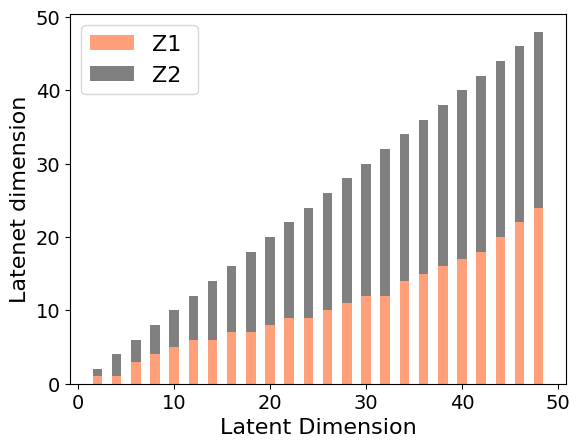

In [58]:
beta_rec = 0.0 # 98304.0 10000.0
batch_size = 128
beta_kl = 0.1 # 0.0 25.0
vae_model = "CNNBasedVAE" # "SVAE" or "CNNBasedVAE"
weight_cross_penalty = 0.0
beta_task = 1000.0 # task aware
VAEepoch = 1399 # 1599
norm_sample = False # False True
rand_crop = True # 'True' or '' or 'False'
dataset = 'PickAndPlace' # 'PickAndPlace' or 'gym_fetch'
VAE_seed = 0
lr = 1e-4
if norm_sample:
    model_type = "VAE"
else:
    model_type = "DAE"
if rand_crop:
    rc = "randcrop"
else:
    rc = "nocrop"

### load csv file
### Distributed Task-aware
sucess_rate = []
z_list = []
rep_dims = [[], [], []]
z_list.append([])
sucess_rate.append([])
vae_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{rc}_{vae_model}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{VAE_seed}/DVAE_awa-{VAEepoch}.pth'
csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            sucess_rate[-1].append(float(row[4]))
            rep_dims[0].append(int(row[5]))
            rep_dims[1].append(int(row[6]))
            rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 1, color='lightsalmon', label='Z1')
plt.bar(z_list[0], rep_dims[1], 1, color='grey', label='Z2 ', bottom=rep_dims[0])
plt.ylabel("Latenet dimension", fontsize=16)
plt.xlabel("Latent Dimension", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Importance of representations (fully recon)')
plt.savefig('../plots/PnP/z_importance.png', bbox_inches='tight', dpi=300)
plt.show()

In [59]:
### Joint
z_dim = 48
beta_rec = 5000.0 # 98304.0 10000.0
batch_size = 128
beta_kl = 0.0 # 1.0 25.0
vae_model = "JointCNNBasedVAE" # "SVAE" or "CNNBasedVAE"
weight_cross_penalty = 0.0
beta_task = 500.0 # task aware
VAEepoch = 1299
norm_sample = False # False True
rand_crop = True # 'True' or '' or 'False'
dataset = 'PickAndPlace' # 'PickAndPlace' or 'gym_fetch'
VAE_seed = 0
lr = 1e-4
rep_dims = [[], [], []]
z_list.append([])
sucess_rate.append([])
vae_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{rc}_{vae_model}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{VAE_seed}/DVAE_awa-{VAEepoch}.pth'
csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            sucess_rate[-1].append(float(row[4]))
            rep_dims[0].append(int(row[5]))
            rep_dims[1].append(int(row[6]))
            rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)


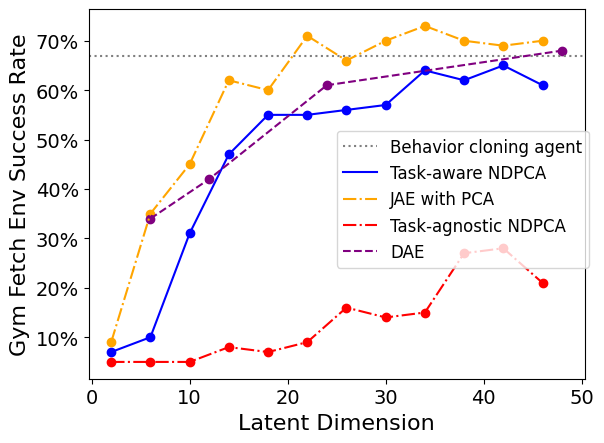

In [60]:
### Fully recon
beta_kl = 0.0
weight_cross_penalty = 0.0
beta_task = 0.0 # task aware
beta_rec = 10000.0
VAEepoch = 1599
vae_model = "CNNBasedVAE" # "SVAE" or "CNNBasedVAE"
rep_dims = [[], [], []]
z_list.append([])
sucess_rate.append([])
vae_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{rc}_{vae_model}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{VAE_seed}/DVAE_awa-{VAEepoch}.pth'
csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            sucess_rate[-1].append(float(row[4]))
            rep_dims[0].append(int(row[5]))
            rep_dims[1].append(int(row[6]))
            rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)

### plot
### Behavior cloning agent
plt.axhline(y = 0.67, color = 'gray', linestyle = ':', label='Behavior cloning agent')

### DAE
label = ['Task-aware NDPCA', 'JAE with PCA'] + ['Task-agnostic NDPCA']
color_list = ['b', 'orange', 'r']
line_style = ['-', '-.', '-.']
for l, z, sr, c, ls in zip(label, z_list, sucess_rate, color_list, line_style):
    plt.plot(z[::2], sr[::2], c=c, label=l, linestyle=ls)
    plt.scatter(z[::2], sr[::2], c=c)

### real learning model
plt.plot([6, 12, 24, 48], [0.34, 0.42, 0.61, 0.68], c='purple', label='DAE', linestyle='--')
plt.scatter([6, 12, 24, 48], [0.34, 0.42, 0.61, 0.68], c='purple')

plt.ylabel("Gym Fetch Env Success Rate", fontsize=16)
plt.xlabel("Latent Dimension", fontsize=16)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(0.5, 0.67), loc='upper left', borderaxespad=0, fontsize=12)
# plt.title(f"Success Rate vs Latent Dimension") # \n beta kl={beta_kl}, beta_rec={beta_rec},task weight={task_weight}, beta_cor={weight_cross_penalty}")
plt.savefig('../plots/PnP/dpca_acc.png', bbox_inches='tight', dpi=300)
plt.show()